c:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] i

Detected bicycle with confidence 0.998 at location [203.2, 315.15, 274.88, 439.71]
Detected potted plant with confidence 0.952 at location [214.17, 42.03, 258.02, 93.81]
Detected car with confidence 0.958 at location [79.93, 225.61, 111.35, 302.49]
Detected car with confidence 0.998 at location [558.71, 205.46, 810.25, 360.19]
Detected truck with confidence 0.995 at location [100.39, 89.03, 262.37, 314.29]
Detected potted plant with confidence 0.968 at location [178.04, 229.75, 286.54, 327.12]
Detected car with confidence 0.965 at location [747.33, 199.07, 871.92, 346.23]
Detected truck with confidence 0.99 at location [0.13, 91.71, 97.43, 356.0]
Detected car with confidence 0.971 at location [419.33, 224.35, 482.34, 267.33]
Detected person with confidence 0.996 at location [157.77, 144.4, 298.89, 396.23]
Detected car with confidence 0.999 at location [286.4, 213.12, 459.89, 351.7]
Detected car with confidence 0.98 at location [420.51, 226.15, 479.55, 319.67]
Detected car with confiden

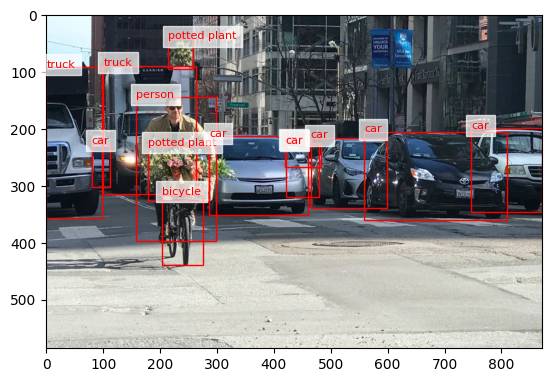

In [1]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

url = "https://miro.medium.com/v2/resize:fit:1400/format:webp/1*EYFejGUjvjPcc4PZTwoufw.jpeg"
image = Image.open(requests.get(url, stream=True).raw)
# image = Image.open(r"C:\Users\a21ma\OneDrive\Desktop\cyclinc.jpeg")

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]


for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )
    
labels = results["labels"]
boxes = results["boxes"]

image_np = image.convert("RGB") #this is done just in case the original image was not RGB
# image_np = torch.Tensor(np.array(image_np))

fig,ax = plt.subplots()

for label, box in zip(labels, boxes):
    label_name = model.config.id2label[label.item()]
    box = box.tolist()

    # Draw the bounding box rectangle
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Add label text near the bounding box
    ax.text(box[0], box[1], label_name, color='r', fontsize=8, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))

ax.imshow(image_np)